# PURPOSE
* The purpose of this notebook is to create a multiple linear regression model
* The Iris Flower Dataset will be used
* The DVs are: Sepal Length, Sepal Width, Petal Width, and Species
* The IV is Petal Length
* Brandon Johnson

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from feature_engine.encoding import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.columns.to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [30]:
cat_column = ['species']
encoded_species = OneHotEncoder().fit_transform(iris[cat_column])
encoded_species.sample(5)

,species_setosa,species_versicolor,species_virginica
32,1,0,0
5,1,0,0
127,0,0,1
140,0,0,1
83,0,1,0


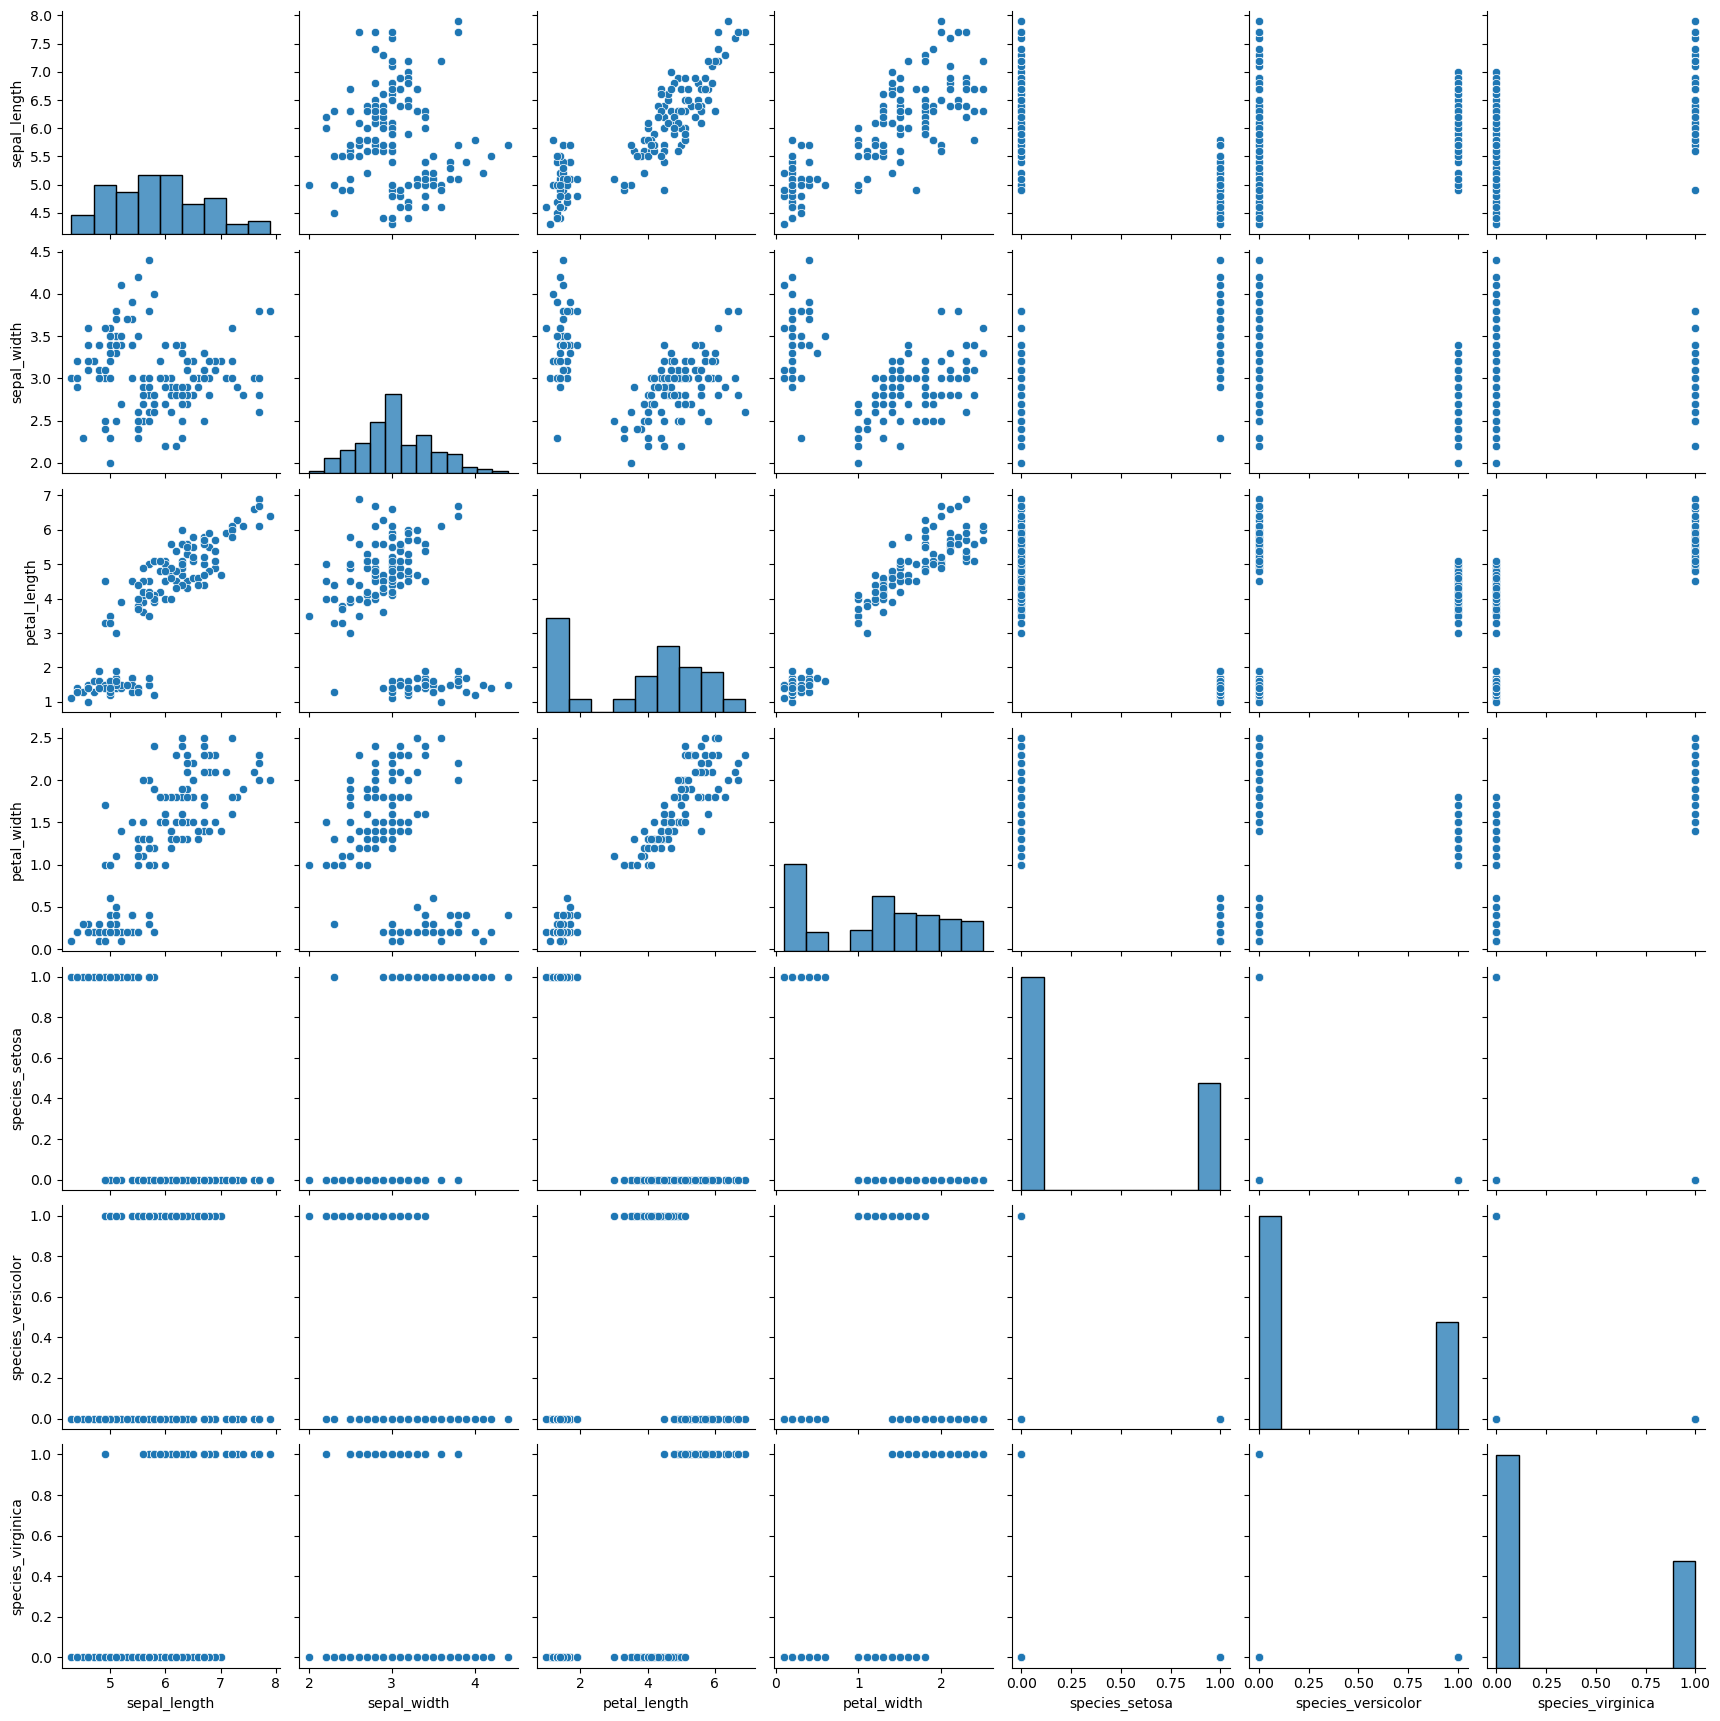

In [9]:
eda_df = pd.DataFrame(np.column_stack((iris,encoded_species)), columns=iris.columns.to_list()+encoded_species.columns.to_list())

sns.pairplot(eda_df)

### DATA PARTITIONING

In [11]:
y = iris.petal_length
X = eda_df.drop(['petal_length','species','species_virginica'],axis=1)

In [12]:
y.head()

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: petal_length, dtype: float64

In [13]:
X.head()

,sepal_length,sepal_width,petal_width,species_setosa,species_versicolor
0,5.1,3.5,0.2,1,0
1,4.9,3.0,0.2,1,0
2,4.7,3.2,0.2,1,0
3,4.6,3.1,0.2,1,0
4,5.0,3.6,0.2,1,0


In [18]:
X = X.astype('float32')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        150 non-null    float32
 1   sepal_width         150 non-null    float32
 2   petal_width         150 non-null    float32
 3   species_setosa      150 non-null    float32
 4   species_versicolor  150 non-null    float32
dtypes: float32(5)
memory usage: 3.1 KB


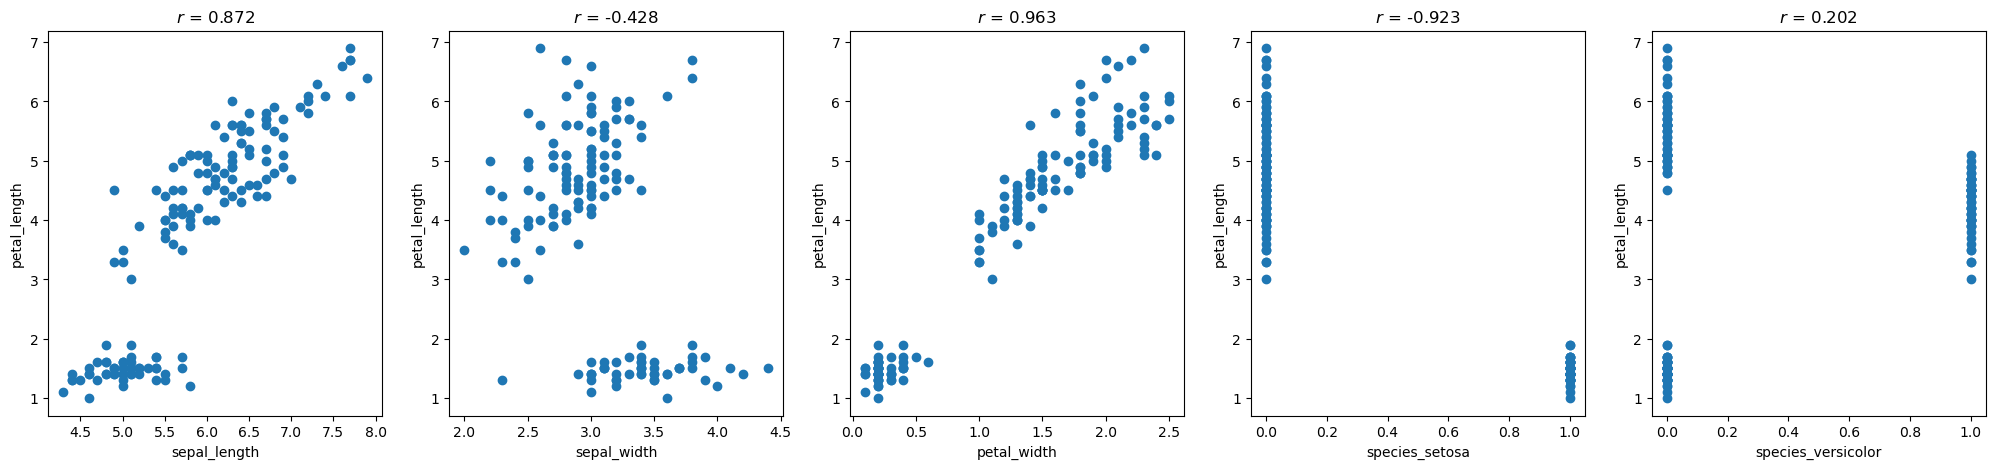

In [48]:
fig,axs = plt.subplots(1,5,figsize=(25,5))

for i,ax in enumerate(axs.flatten()):
    x = X.iloc[:,i]
    corr = np.corrcoef(x.values,y.values)[0,1]
    ax.scatter(x.values,y.values)
    ax.set_title(f'$r$ = {corr:.3f}')
    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)

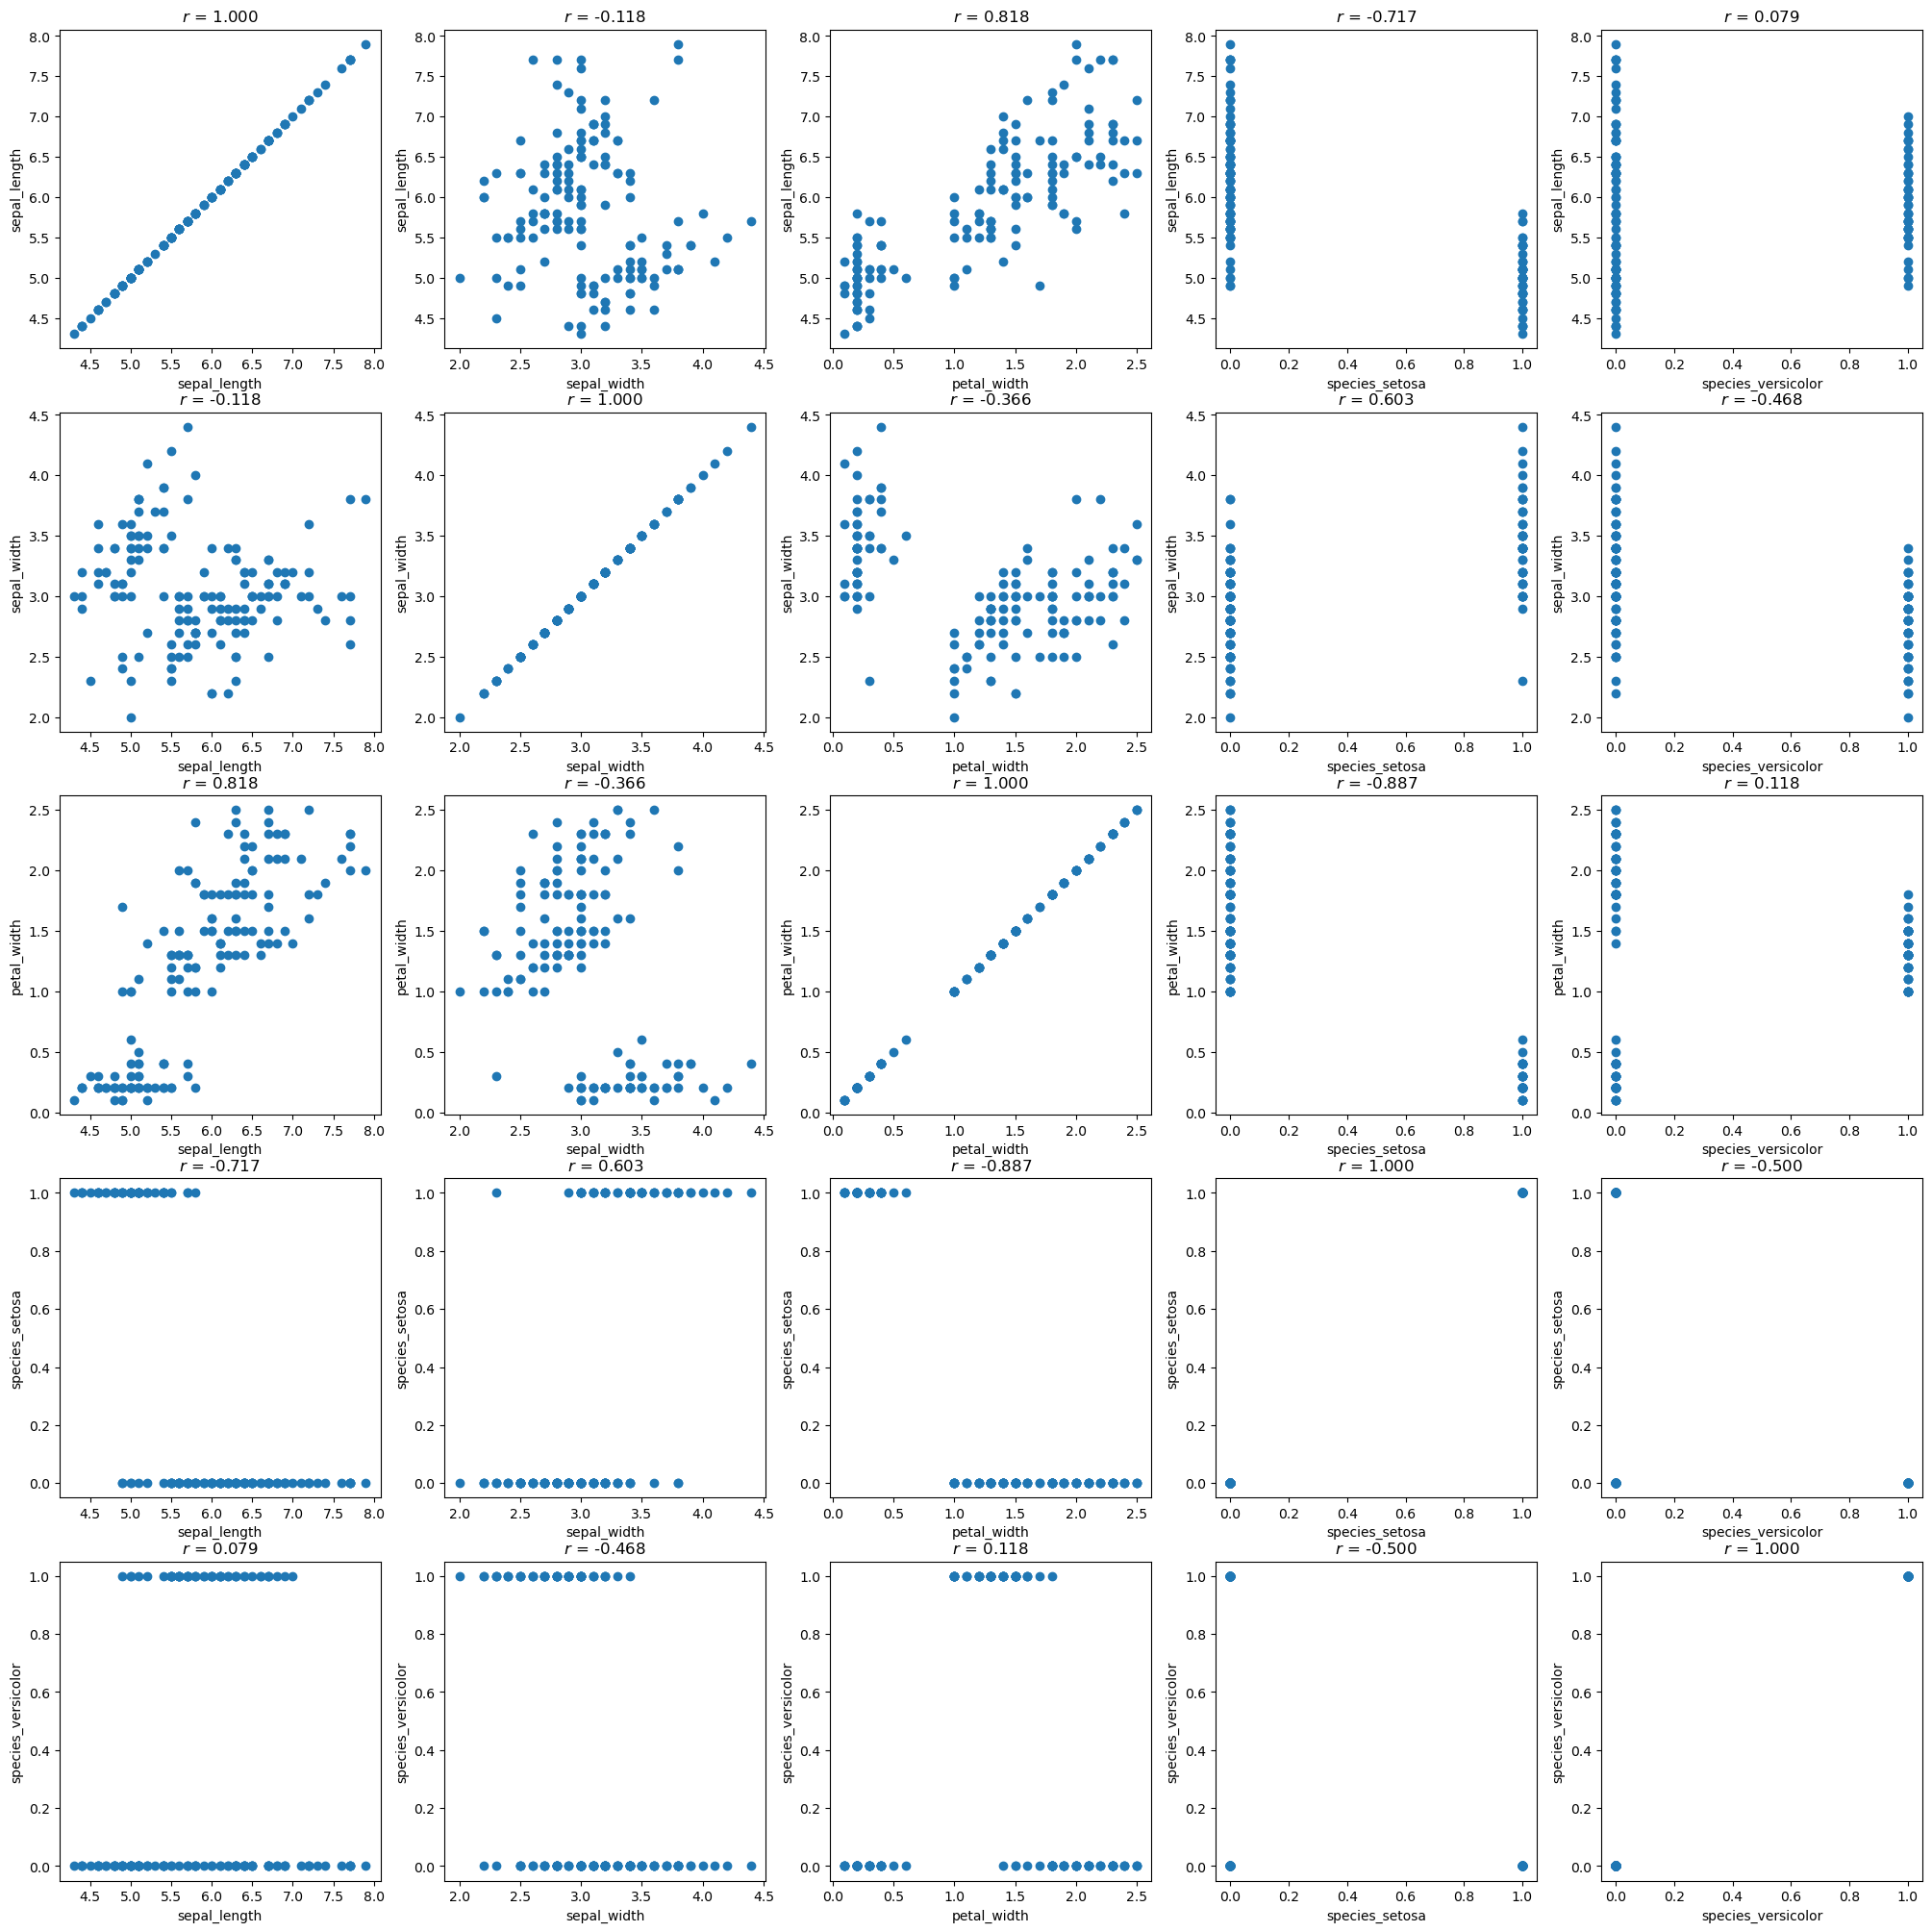

In [53]:
fig, axs = plt.subplots(5,5,figsize=(25,25))

for i in range(len(X.columns)):
    for j in range(len(X.columns)):
        x = X.iloc[:,j]
        y = X.iloc[:,i]
        corr = np.corrcoef(x.values,y.values)[0,1]
        axs[i,j].scatter(x.values,y.values)
        axs[i,j].set_xlabel(x.name)
        axs[i,j].set_ylabel(y.name)
        axs[i,j].set_title(f'$r$ = {corr:.3f}')
plt.show()

### MODELING

In [19]:
model = sm.OLS(endog=y,exog=sm.add_constant(X)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           petal_length   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1317.
Date:                Sat, 18 Feb 2023   Prob (F-statistic):          2.88e-118
Time:                        10:51:48   Log-Likelihood:                -9.2833
No. Observations:                 150   AIC:                             30.57
Df Residuals:                     144   BIC:                             48.63
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8632      0.305      2.828      0.005       0.260       1.467
sepal_length           0.6080      0.050     12.101      0.000       0.509       0.707
sepal_width           -0.1805      0.080     -2.246      0.026      -0.339      -0.022
petal_width            0.6022      0.121      4.959      0.000       0.362       0.842
species_setosa        -1.9742      0.245     -8.065      0.000      -2.458      -1.490
species_versicolor    -0.5109      0.095     -5.377      0.000      -0.699      -0.323
==============================================================================
Omnibus:                        0.896   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.639   Jarque-Bera (JB):                0.515
Skew:                          -0.044   Prob(JB):                        0.773
Kurtosis:                       3.273   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['vif'] = [variance_inflation_factor(exog=X.values,exog_idx=i) for i in range(len(X.columns))]
vif_df

,feature,vif
0,sepal_length,117.934964
1,sepal_width,133.721105
2,petal_width,56.021168
3,species_setosa,30.883688
4,species_versicolor,4.250301


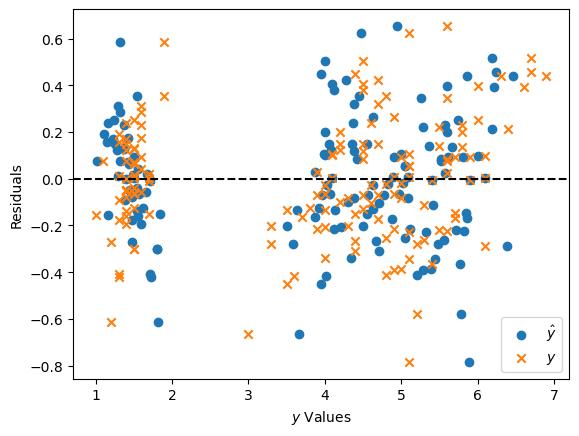

In [37]:
plt.scatter(model.predict(),model.resid,label='$\\hat{y}$')
plt.scatter(y,model.resid,marker='x',label='$y$')
plt.axhline(0,c='k',ls='--')
plt.xlabel('$y$ Values')
plt.ylabel("Residuals")
plt.legend()
plt.show()

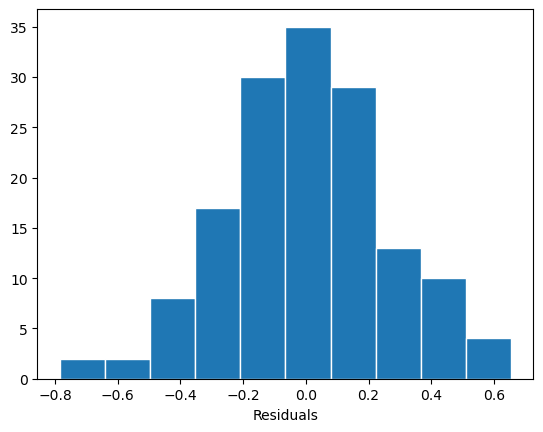

In [27]:
plt.hist(model.resid,edgecolor='w')
plt.xlabel('Residuals')
plt.show()

**ACCEPTABLE DVs VALUES FOR MAKING PREDICTIONS WITH THE MODEL**

In [41]:
X.agg(['min','max','mean','std','median']).T

,min,max,mean,std,median
sepal_length,4.3,7.9,5.843333,0.828066,5.8
sepal_width,2.0,4.4,3.057333,0.435866,3.0
petal_width,0.1,2.5,1.199333,0.762238,1.3
species_setosa,0.0,1.0,0.333333,0.472983,0.0
species_versicolor,0.0,1.0,0.333333,0.472984,0.0
